<a href="https://colab.research.google.com/github/AD-I/Breast-Cancer-Model/blob/master/Breast_Cancer_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Breast Cancer Neuronal Network

##Import all frameworks

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##Upload breast cancer dataset

In [2]:
!git clone https://github.com/AD-I/Breast-Cancer-Model.git

Cloning into 'Breast-Cancer-Model'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 10 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [3]:
df = pd.read_csv('Breast-Cancer-Model/data.csv')

##Modify the dataset

In [ ]:
df

In [4]:
mapdict = {'M':1,'B':0}
df['diagnosis'] = df['diagnosis'].map(mapdict)
df = df.drop(columns=['Unnamed: 32'])

In [ ]:
df

In [ ]:
df.describe()

In [ ]:
df.corr()['diagnosis'].sort_values(ascending=[False])

##Extract the data by **Features** and **Labels** 

In [5]:
#df = df.sample(frac=1)
labels = df['diagnosis']
my_features = ['concave points_worst',
               'perimeter_worst',
               'concave points_mean',
               'radius_worst',
               'perimeter_mean',
               'area_worst',
               'radius_mean',
               'area_mean',
               'concavity_mean',
               'concavity_worst',
               'compactness_mean',
               'compactness_worst'
               ]
features = df[my_features]
labels = labels.to_numpy()
features = features.to_numpy()


In [ ]:
print('Labels')
print(labels.shape, end=' ')
print(labels.ndim)

print('\nFeatures:')
print(features.shape, end=' ')
print(features.ndim)

###Split the data between train, validation and test data

Should try split more the data with train, validation and test data to check if the model is overfited.

In [6]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(features, labels, test_size=0.3)
x_valid, x_test, y_valid, y_test = train_test_split(x_valid, y_valid, test_size=0.33)

In [ ]:
print('Train')
print('Features: ', x_train.shape, end=' Labels: ')
print(y_train.shape)
print('Validation')
print('Features: ', x_valid.shape, end=' Labels: ')
print(y_valid.shape)
print('Test')
print('Features: ', x_test.shape, end=' Labels: ')
print(y_test.shape)

Train
Features:  (398, 12) Labels: (398,)
Validation
Features:  (114, 12) Labels: (114,)
Test
Features:  (57, 12) Labels: (57,)


In [8]:
x_train = tf.convert_to_tensor(x_train, np.float64)
y_train = tf.convert_to_tensor(y_train, np.float64)

x_valid = tf.convert_to_tensor(x_valid, np.float64)
y_valid = tf.convert_to_tensor(y_valid, np.float64)

x_test = tf.convert_to_tensor(x_test, np.float64)
y_test = tf.convert_to_tensor(y_test, np.float64)

##Model

### Functional API Model

In [9]:
def create_model(lr=0.001, n_hidden_neurons=6, dropout=True):
  tf.keras.backend.clear_session()

  inputs = tf.keras.Input(shape=(12,), name='input')
  x = tf.keras.layers.Dense(n_hidden_neurons, activation='relu')(inputs)
  if dropout:
    drop = tf.keras.layers.Dropout(.2)(x)
    outputs = tf.keras.layers.Dense(2, activation='softmax')(drop)
  else:
    outputs = tf.keras.layers.Dense(2, activation='softmax')(x)

  model = tf.keras.Model(inputs=inputs, outputs=outputs, name='breast_cancer_model')

  model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
    metrics=['accuracy']
  )

  return model

In [10]:
model = create_model(1e-5, 20, dropout=False)
epochs = 150
batch_size = 32

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    (lambda epoch: 1e-5 * 10**(epoch / 30))
)

history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=2,
    validation_data=(x_valid, y_valid),
    callbacks=[lr_schedule]
)

Epoch 1/150
13/13 - 0s - loss: 0.6782 - accuracy: 0.5578 - val_loss: 0.6713 - val_accuracy: 0.6842 - lr: 1.0000e-05
Epoch 2/150
13/13 - 0s - loss: 0.6780 - accuracy: 0.5603 - val_loss: 0.6712 - val_accuracy: 0.6842 - lr: 1.0798e-05
Epoch 3/150
13/13 - 0s - loss: 0.6778 - accuracy: 0.5704 - val_loss: 0.6711 - val_accuracy: 0.6842 - lr: 1.1659e-05
Epoch 4/150
13/13 - 0s - loss: 0.6776 - accuracy: 0.5754 - val_loss: 0.6709 - val_accuracy: 0.6842 - lr: 1.2589e-05
Epoch 5/150
13/13 - 0s - loss: 0.6774 - accuracy: 0.5754 - val_loss: 0.6708 - val_accuracy: 0.6842 - lr: 1.3594e-05
Epoch 6/150
13/13 - 0s - loss: 0.6771 - accuracy: 0.5829 - val_loss: 0.6706 - val_accuracy: 0.6842 - lr: 1.4678e-05
Epoch 7/150
13/13 - 0s - loss: 0.6769 - accuracy: 0.5879 - val_loss: 0.6704 - val_accuracy: 0.6842 - lr: 1.5849e-05
Epoch 8/150
13/13 - 0s - loss: 0.6766 - accuracy: 0.5955 - val_loss: 0.6702 - val_accuracy: 0.6930 - lr: 1.7113e-05
Epoch 9/150
13/13 - 0s - loss: 0.6763 - accuracy: 0.6005 - val_loss: 0.6

In [ ]:
model.summary()

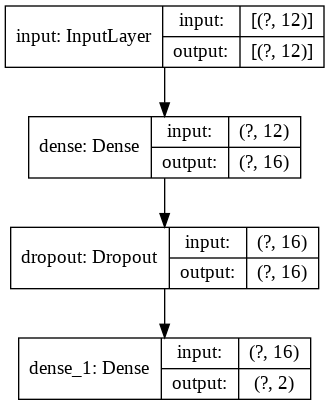

In [82]:
tf.keras.utils.plot_model(
    model, to_file='my_first_model.png', show_shapes=True, show_layer_names=True)


###Show loss and accuaracy per epochs

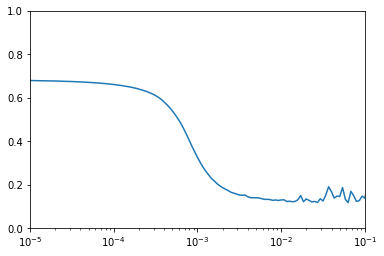

In [11]:
plt.semilogx(history.history['lr'], history.history['loss'])
plt.axis([1e-5, 1e-1, 0, 1])
plt.show()

In [12]:
model = create_model(2e-3, 16)
epochs = 600
batch_size = 32

early_stopping = tf.keras.callbacks.EarlyStopping(patience=20)
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'model_checkpoint.h5', save_best_only=True)

history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=2,
    validation_data=(x_valid, y_valid),
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/600
13/13 - 0s - loss: 0.7074 - accuracy: 0.3719 - val_loss: 0.6743 - val_accuracy: 0.5088
Epoch 2/600
13/13 - 0s - loss: 0.6633 - accuracy: 0.6307 - val_loss: 0.6488 - val_accuracy: 0.8333
Epoch 3/600
13/13 - 0s - loss: 0.6371 - accuracy: 0.7538 - val_loss: 0.6152 - val_accuracy: 0.9211
Epoch 4/600
13/13 - 0s - loss: 0.6054 - accuracy: 0.8141 - val_loss: 0.5793 - val_accuracy: 0.9211
Epoch 5/600
13/13 - 0s - loss: 0.5752 - accuracy: 0.8593 - val_loss: 0.5428 - val_accuracy: 0.9298
Epoch 6/600
13/13 - 0s - loss: 0.5268 - accuracy: 0.8819 - val_loss: 0.5051 - val_accuracy: 0.9298
Epoch 7/600
13/13 - 0s - loss: 0.4871 - accuracy: 0.9045 - val_loss: 0.4597 - val_accuracy: 0.9211
Epoch 8/600
13/13 - 0s - loss: 0.4538 - accuracy: 0.8995 - val_loss: 0.4321 - val_accuracy: 0.9298
Epoch 9/600
13/13 - 0s - loss: 0.4163 - accuracy: 0.9070 - val_loss: 0.4024 - val_accuracy: 0.9298
Epoch 10/600
13/13 - 0s - loss: 0.3925 - accuracy: 0.8995 - val_loss: 0.3681 - val_accuracy: 0.9298
Epoch 11/

In [121]:
model = tf.keras.models.load_model('model_checkpoint.h5')

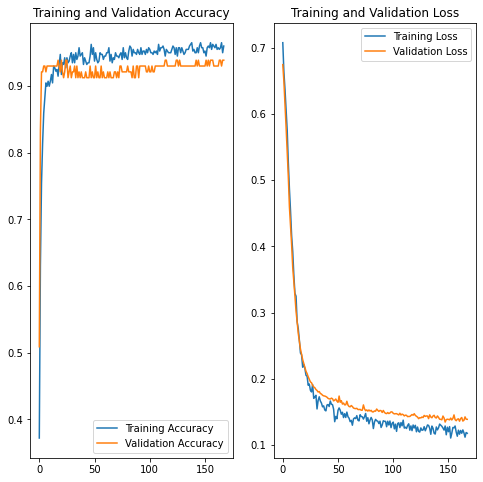

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(168)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

###Predict values

In [14]:
example = df.iloc[[162]]
print(f"Label: {example['diagnosis']}")
data = (example[my_features]).to_numpy()
data = min_max_scaler.fit_transform(data)
data = tf.convert_to_tensor(data)
model.predict(data)

Label: 162    1
Name: diagnosis, dtype: int64


array([[9.9942774e-01, 5.7226780e-04]], dtype=float32)

### Use test set

In [15]:
print(len(tf.keras.backend.get_value(x_test)), 'Total values')
for test_feature, test_label in zip(x_test, y_test):
  true_label = tf.keras.backend.get_value(test_label)
  print(f'Label: {true_label}', end=" ")

  test_feature = tf.expand_dims(test_feature, 0)
  predicted = model.predict(test_feature)[0]
  
  if predicted[0] > predicted[1]:
    if true_label == 0.0:
      print(predicted, "\U0000274E" + "\n")
    else:
      print(predicted, "\U0000274C" + "\n")
  else:
    if true_label == 1.0:
      print(predicted, "\U00002705" + "\n")
    else:
      print(predicted, "\U0000274C" + "\n")

57 Total values
Label: 1.0 [0.06942886 0.9305711 ] ✅

Label: 0.0 [0.9863848  0.01361514] ❎

Label: 0.0 [0.99816656 0.00183347] ❎

Label: 0.0 [0.99533504 0.00466499] ❎

Label: 1.0 [0.00166576 0.9983342 ] ✅

Label: 1.0 [9.4630951e-07 9.9999905e-01] ✅

Label: 1.0 [0.0580805 0.9419195] ✅

Label: 0.0 [0.99275875 0.00724127] ❎

Label: 0.0 [0.9941491  0.00585092] ❎

Label: 1.0 [0.0754259 0.9245741] ✅

Label: 1.0 [0.00196793 0.99803203] ✅

Label: 0.0 [0.987045   0.01295499] ❎

Label: 1.0 [5.552576e-06 9.999944e-01] ✅

Label: 0.0 [0.9847329  0.01526712] ❎

Label: 0.0 [0.9915697  0.00843033] ❎

Label: 0.0 [0.95917404 0.04082594] ❎

Label: 0.0 [0.9926213  0.00737872] ❎

Label: 1.0 [1.2995813e-09 1.0000000e+00] ✅

Label: 0.0 [0.99019367 0.00980637] ❎

Label: 1.0 [0.06088327 0.9391168 ] ✅

Label: 0.0 [0.9861988  0.01380117] ❎

Label: 1.0 [0.04894489 0.95105517] ✅

Label: 0.0 [0.95861435 0.04138567] ❎

Label: 1.0 [3.9022675e-07 9.9999964e-01] ✅

Label: 1.0 [0.14596386 0.85403615] ✅

Label: 0.0 [0.97

## Save trained model

In [16]:
tf.saved_model.save(model, './modelTF')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./modelTF/assets


Download the model

In [17]:
!zip -r model.zip ./modelTF
!ls

  adding: modelTF/ (stored 0%)
  adding: modelTF/variables/ (stored 0%)
  adding: modelTF/variables/variables.data-00000-of-00002 (deflated 75%)
  adding: modelTF/variables/variables.index (deflated 61%)
  adding: modelTF/variables/variables.data-00001-of-00002 (deflated 14%)
  adding: modelTF/saved_model.pb (deflated 86%)
  adding: modelTF/assets/ (stored 0%)
Breast-Cancer-Model  model_checkpoint.h5  modelTF  model.zip  sample_data


In [18]:
try:
  from google.colab import files
  files.download('./model.zip')
except ImportError:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>